In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv("../input/titanic/train.csv")
test=pd.read_csv("../input/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
def desc(df):
    summary=pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary=summary.reset_index()
    summary['Name']=summary['index']
    summary=summary[['Name','dtypes']]
    summary['Missing']=df.isnull().sum().values
    summary['Unique']=df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [6]:
desc(train)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,PassengerId,int64,0,891,1,2,3
1,Survived,int64,0,2,0,1,1
2,Pclass,int64,0,3,3,1,3
3,Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
4,Sex,object,0,2,male,female,female
5,Age,float64,177,88,22,38,26
6,SibSp,int64,0,7,1,1,0
7,Parch,int64,0,7,0,0,0
8,Ticket,object,0,681,A/5 21171,PC 17599,STON/O2. 3101282
9,Fare,float64,0,248,7.25,71.2833,7.925


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print('The number of samples into the train data is {}.'.format(train.shape[0]))

The number of samples into the train data is 891.


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
desc(test)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,PassengerId,int64,0,418,892,893,894
1,Pclass,int64,0,3,3,3,2
2,Name,object,0,418,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis"
3,Sex,object,0,2,male,female,male
4,Age,float64,86,79,34.5,47,62
5,SibSp,int64,0,7,0,1,0
6,Parch,int64,0,8,0,0,0
7,Ticket,object,0,363,330911,363272,240276
8,Fare,float64,1,169,7.8292,7,9.6875
9,Cabin,object,327,76,NaN,NaN,NaN


In [11]:
print('The number of samples into the test data is {}.'.format(test.shape[0]))

The number of samples into the test data is 418.


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


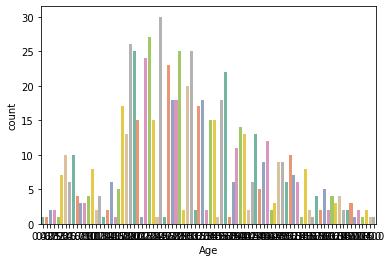

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(x='Age', data=train, palette='Set2')
plt.show()

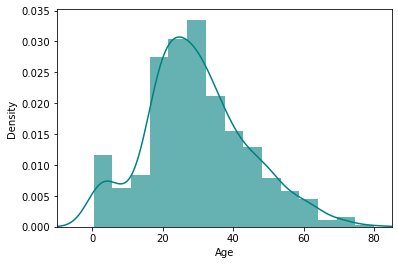

In [15]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


In [16]:
# Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values

In [17]:
# mean age
print('The mean of "Age" is %.2f' %(train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [18]:
print('Percent of missing "Cabe" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabe" records is 77.10%


In [19]:
# since 77 perc value missing so its is not important for model to learn  as featur

In [20]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


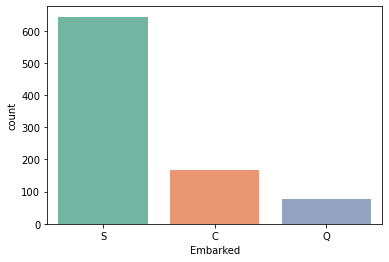

In [21]:
# (C = Cherbourg, Q = Queenstown, S = Southampton):')
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

In [22]:
# Age imputute with meadian since right skewed
# embarked 2 missing and imputute wih most max value S
# Cabin has more than 77 perc missing so we will ignore it

In [23]:
train_data=train.copy()

In [24]:
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [25]:
train_data['Age'].fillna(train["Age"].median(skipna=True),inplace=True)

In [26]:
train_data["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace=True)

In [28]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


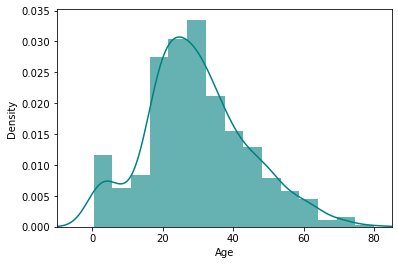

In [30]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


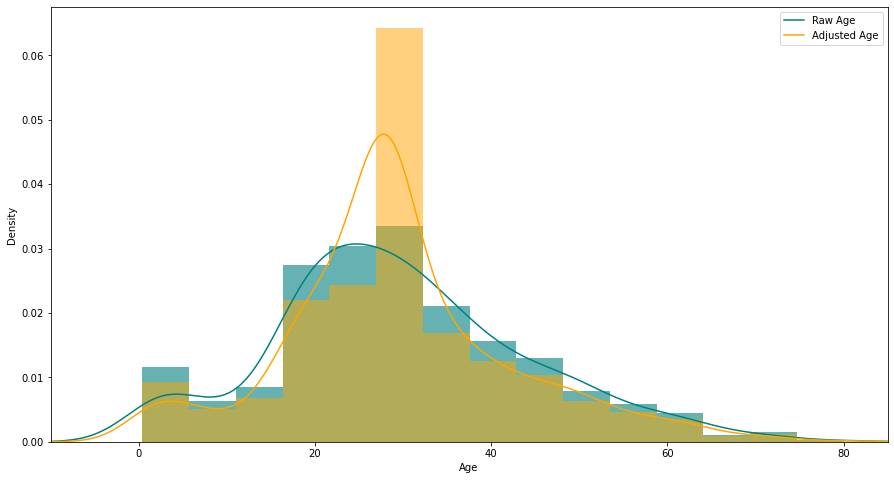

In [31]:
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [32]:
# #create categorical variables and drop some variables

In [33]:
desc(train)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,PassengerId,int64,0,891,1,2,3
1,Survived,int64,0,2,0,1,1
2,Pclass,int64,0,3,3,1,3
3,Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
4,Sex,object,0,2,male,female,female
5,Age,float64,177,88,22,38,26
6,SibSp,int64,0,7,1,1,0
7,Parch,int64,0,7,0,0,0
8,Ticket,object,0,681,A/5 21171,PC 17599,STON/O2. 3101282
9,Fare,float64,0,248,7.25,71.2833,7.925


In [34]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

In [35]:
desc(training)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,PassengerId,int64,0,891,1,2,3
1,Survived,int64,0,2,0,1,1
2,Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
3,Age,float64,0,88,22,38,26
4,SibSp,int64,0,7,1,1,0
5,Parch,int64,0,7,0,0,0
6,Ticket,object,0,681,A/5 21171,PC 17599,STON/O2. 3101282
7,Fare,float64,0,248,7.25,71.2833,7.925
8,Pclass_1,uint8,0,2,0,1,0
9,Pclass_2,uint8,0,2,0,0,0


In [36]:
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)

In [37]:
training.drop('Ticket', axis=1, inplace=True)

In [38]:
training.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [39]:
final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)


In [42]:
testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,1,0


In [43]:
# Exploratory Data Analysis

# *** Exploratory Data Analysis***

# ***Exploration of Age***

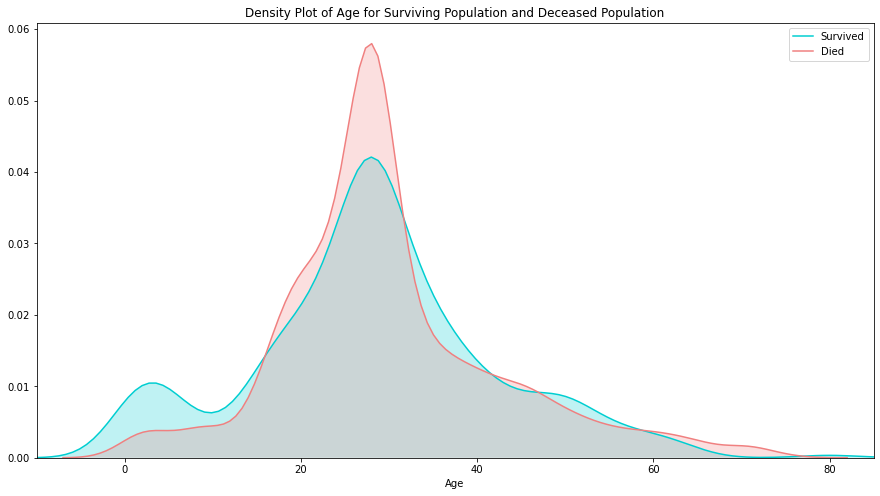

In [44]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

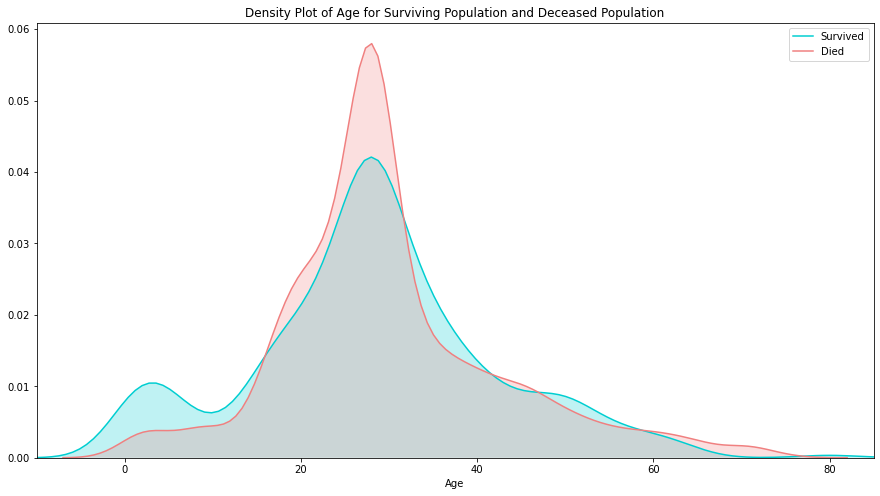

In [45]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train["Age"][final_train.Survived==1],color="darkturquoise",shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived==0],color="lightcoral",shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [46]:
# Distribution of Survived and Died decrease same .
#  survivors, a larger proportion were children

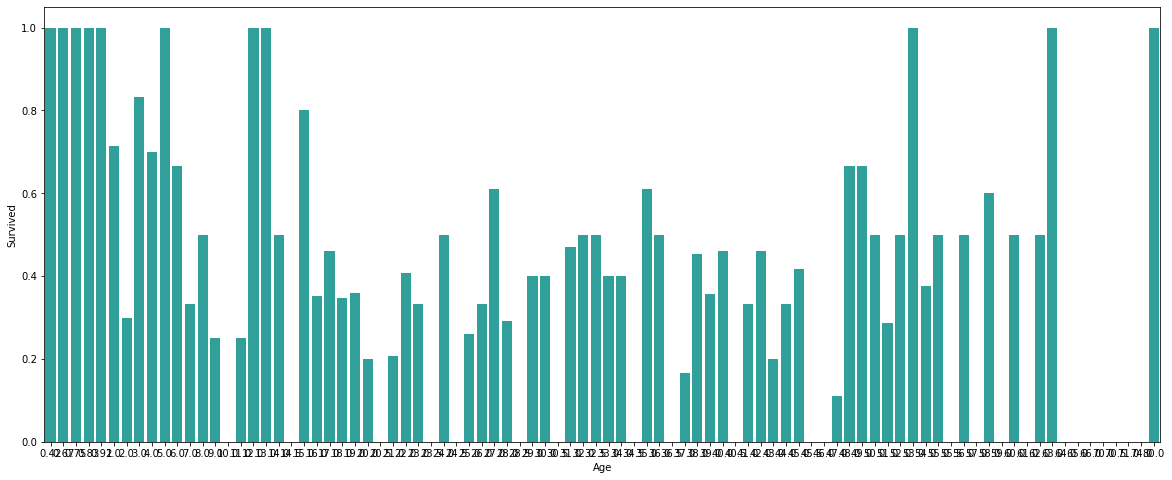

In [47]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

# ***Exploration of Fare***

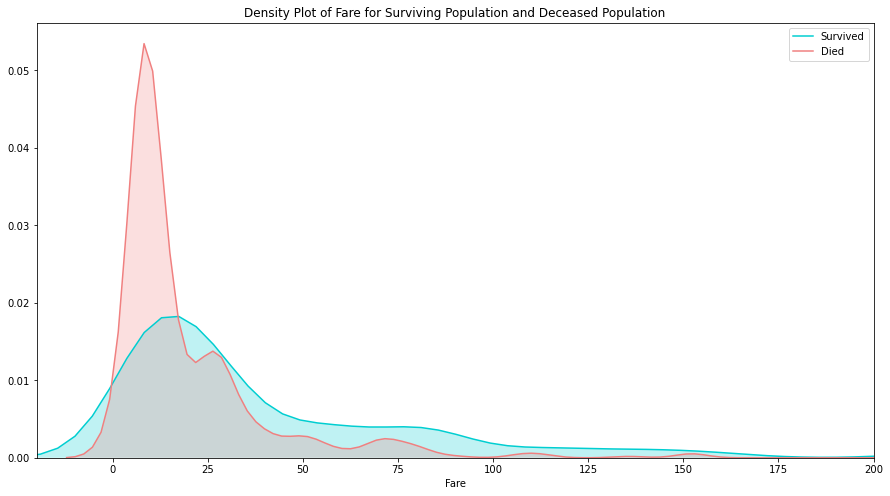

In [48]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [49]:
# Strong correlation
#From above distribution Fare with higher price has more surviving chance. Person with Fare small has less chance to survived

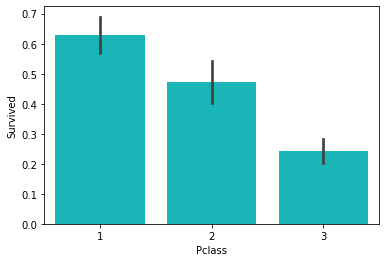

In [50]:
sns.barplot('Pclass', 'Survived', data=train, color="darkturquoise")
plt.show()

In [51]:
# first class passenger was safest.

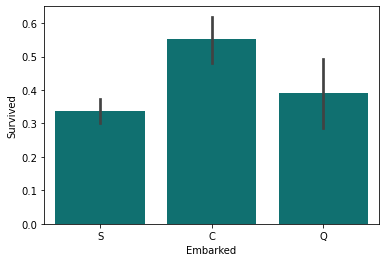

In [52]:
sns.barplot('Embarked', 'Survived', data=train, color="teal")
plt.show()

In [53]:
# Cherbourg has most surviving chance
# in Southhampton has less surviving chance
# 

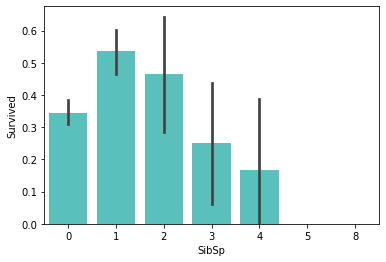

In [54]:
sns.barplot('SibSp', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

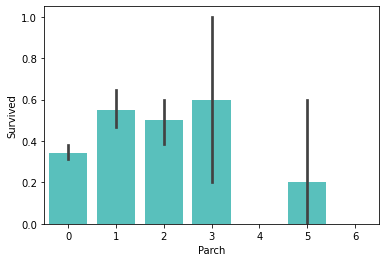

In [55]:
sns.barplot('Parch', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

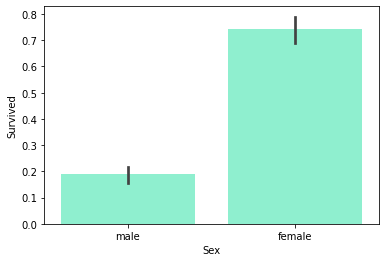

In [56]:
sns.barplot('Sex', 'Survived', data=train, color="aquamarine")
plt.show()

In [57]:
#  Clearly being female greatly increased your chances of survival.

# ***Feature selection***

In [ ]:
#  Recursive feature elimination

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [59]:
final_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,0,1,1,0
888,0,28.0,1,2,23.4500,0,0,1,0,0,1,1,0
889,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1


In [74]:
column_list = final_train.columns.tolist()

In [75]:
(column_list).remove("Survived")

In [76]:
column_list

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male']

In [77]:
y = final_train['Survived']

In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
final_train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,0,1,1,0
888,0,28.0,1,2,23.4500,0,0,1,0,0,1,1,0
889,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X = final_train[cols]
y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


# *** Feature ranking with recursive feature elimination and cross-validation***

Optimal number of features: 6
Selected features: ['Age', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


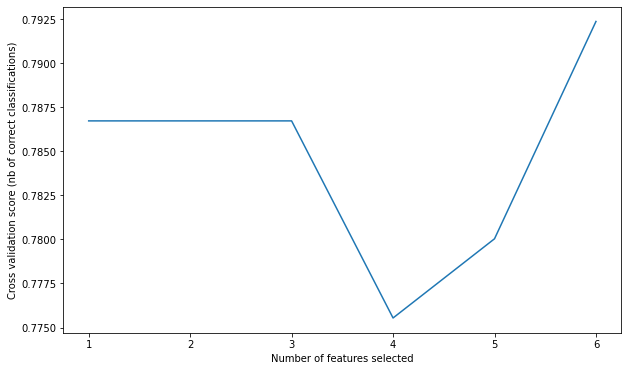

In [108]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

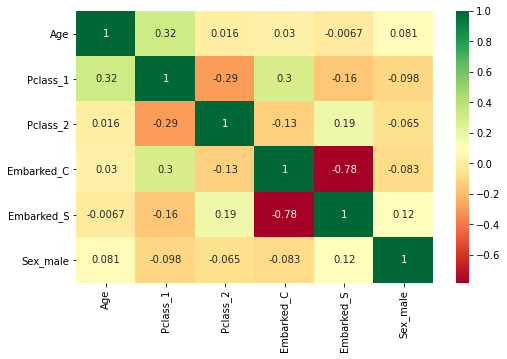

In [109]:
Selected_features= ['Age',  'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']
X = final_train[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split

# ***Model evaluation based on simple train/test split using train_test_split() function***

In [111]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.836


**. Model evaluation based on K-fold cross-validation using cross_val_score() function¶**

In [128]:
cores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.791
LogisticRegression average log_loss is 0.456
LogisticRegression average auc is 0.847


 Model evaluation based on K-fold cross-validation using cross_validate() function

In [129]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.023)
LogisticRegression average log_loss: 0.456 (+/-0.038)
LogisticRegression average auc: 0.847 (+/-0.029)


In [127]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
cols = ["Age","Fare","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"]

X = final_train[cols]
X=preprocessing.scale(X)

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV,X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.790 (+/-0.023)
LogisticRegression average log_loss: 0.456 (+/-0.038)
LogisticRegression average auc: 0.847 (+/-0.029)


 GridSearchCV evaluating using multiple scorers simultaneously

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)


best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 0.792596823802649


In [ ]:
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

In [ ]:
_